In [57]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

# Упражнение 4.1

In [5]:
from thinkdsp import read_wave

rain_segment = read_wave('rain.wav').segment(start=1.0, duration=10.0)
rain_segment.make_audio()

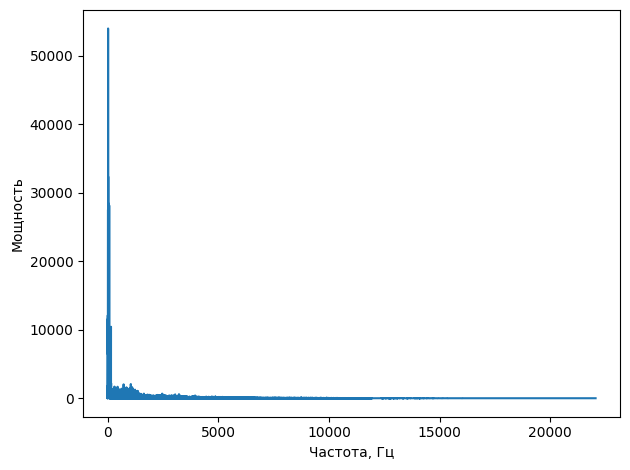

In [12]:
from thinkdsp import decorate

rain_spectrum = rain_segment.make_spectrum()
rain_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность')

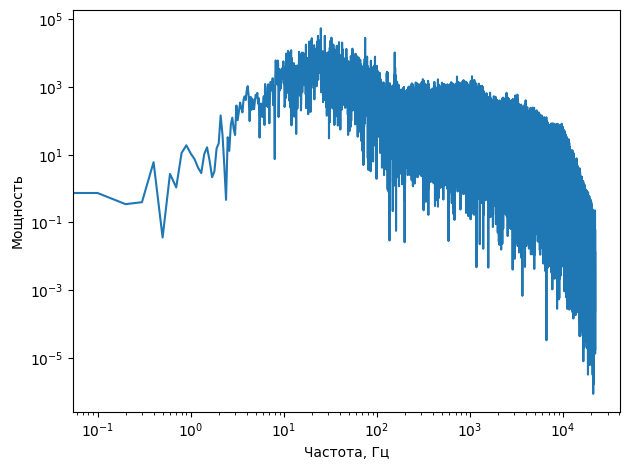

In [13]:
rain_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [56]:
rain_spectrum.estimate_slope().slope

-2.3970369443187334

In [19]:
sea_segment = read_wave('sea.wav').segment(start=1.0, duration=4.0)
sea_segment.make_audio()

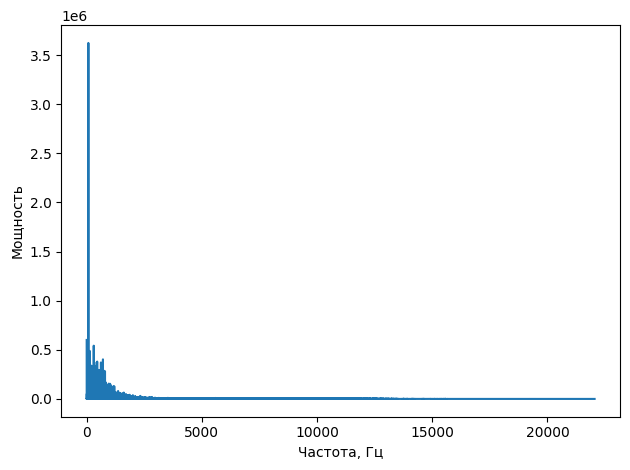

In [20]:
sea_spectrum = sea_segment.make_spectrum()
sea_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность')

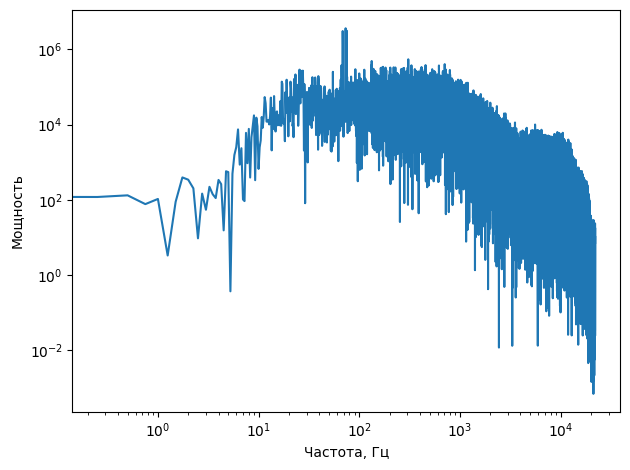

In [21]:
sea_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [54]:
sea_spectrum.estimate_slope().slope

-2.016762541969793

In [22]:
wind_segment = read_wave('wind.wav').segment(start=1.0, duration=10.0)
wind_segment.make_audio()

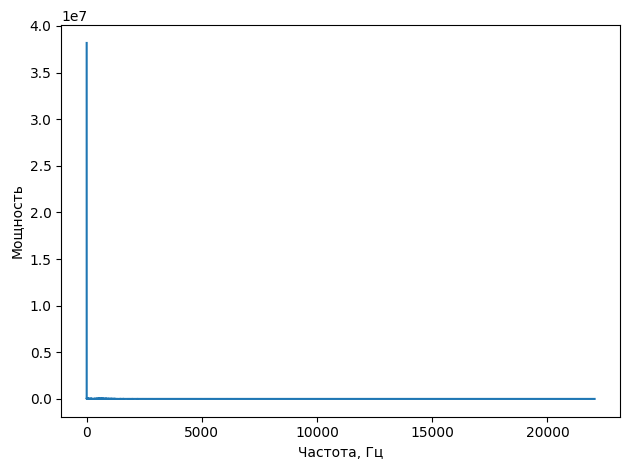

In [23]:
wind_spectrum = wind_segment.make_spectrum()
wind_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность')

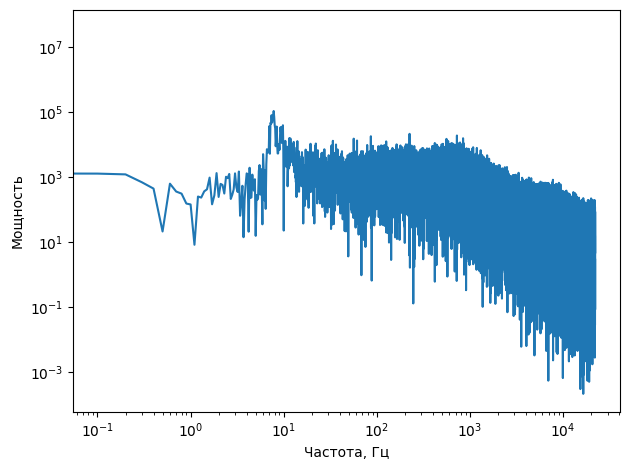

In [24]:
wind_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [55]:
wind_spectrum.estimate_slope().slope

-1.1251650664762953

# Упражнение 4.2

In [27]:
from thinkdsp import Spectrum
import numpy as np

def bartlett(wave, seg_length=512, win_flag=True):
    spectrum = wave.make_spectrogram(seg_length, win_flag)
    segments = spectrum.spec_map.values()

    power_segments = []
    for segment in segments:
        power_segments.append(segment.power)

    hs = np.sqrt(sum(power_segments)/len(power_segments))
    fs = next(iter(segments)).fs

    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

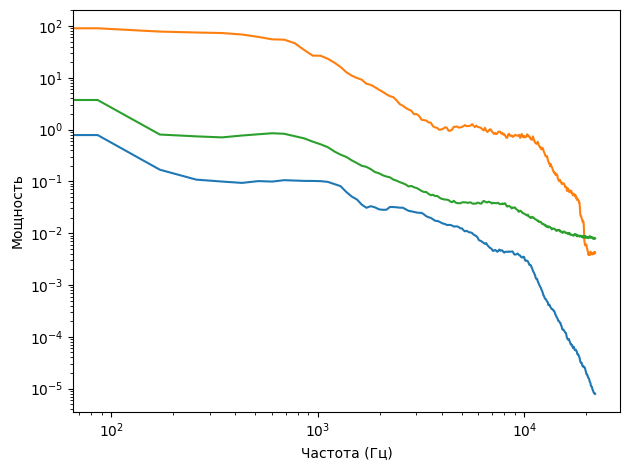

In [28]:
rain = bartlett(rain_segment)

sea = bartlett(sea_segment)

wind = bartlett(wind_segment)

rain.plot_power()
sea.plot_power()
wind.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

# Упражнение 4.3

In [33]:
import pandas as pd

data = pd.read_csv('BTC-USD.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3521,2024-05-08,62332.640625,62986.085938,60877.128906,61187.941406,61187.941406,26088172222
3522,2024-05-09,61191.199219,63404.914063,60648.074219,63049.960938,63049.960938,25453338161
3523,2024-05-10,63055.191406,63446.742188,60208.781250,60792.777344,60792.777344,27804954694
3524,2024-05-11,60793.355469,61451.152344,60492.625000,60793.710938,60793.710938,13842272968


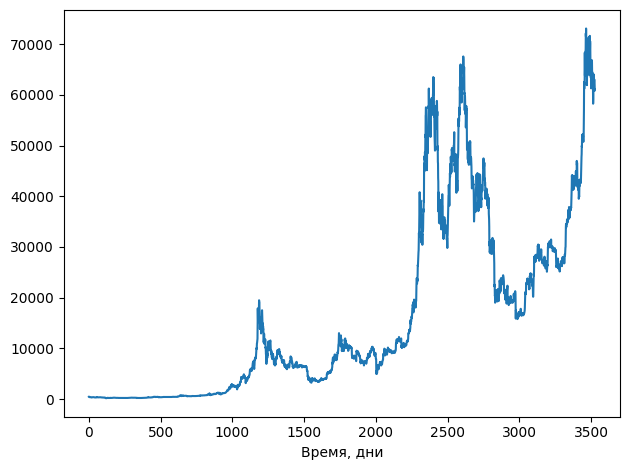

In [35]:
from thinkdsp import Wave

btc_wave = Wave(data['Close'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Время, дни')

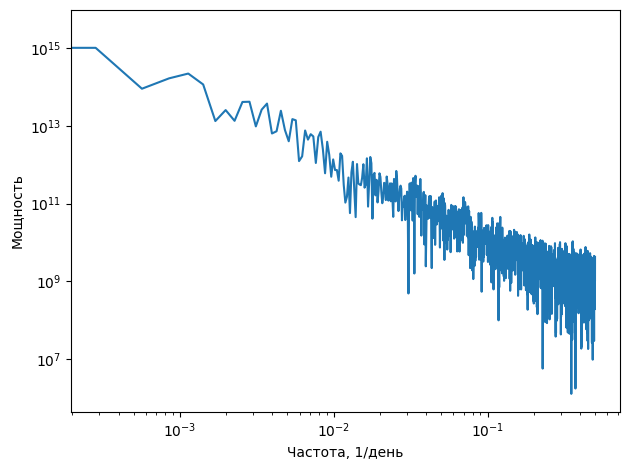

In [36]:
btc_spectrum = btc_wave.make_spectrum()
btc_spectrum.plot_power()
decorate(xlabel='Частота, 1/день', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [53]:
btc_spectrum.estimate_slope().slope

-1.8123301201410484

# Упражнение 4.4

In [39]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

In [40]:
like_geiger_signal = UncorrelatedPoissonNoise(amp=0.001)
like_geiger_wave = like_geiger_signal.make_wave(duration=2.0, framerate=10000)
like_white_noise_signal = UncorrelatedPoissonNoise(amp=1)
like_white_noise_wave = like_white_noise_signal.make_wave(duration=2.0, framerate=10000)

like_geiger_wave.make_audio()

In [41]:
like_white_noise_wave.make_audio()

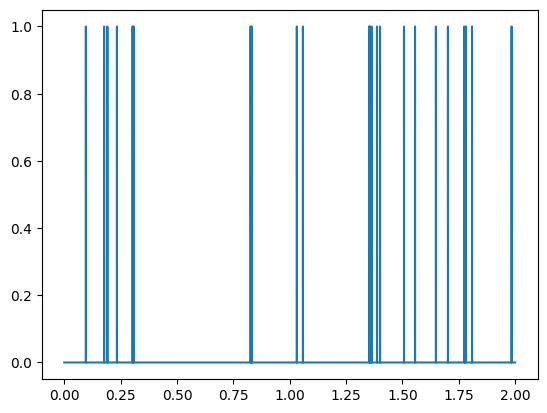

In [42]:
like_geiger_wave.plot()

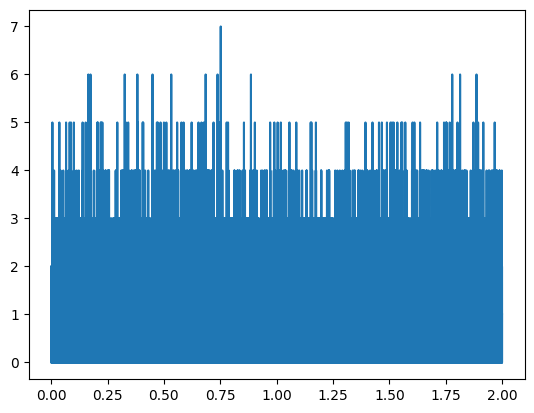

In [43]:
like_white_noise_wave.plot()

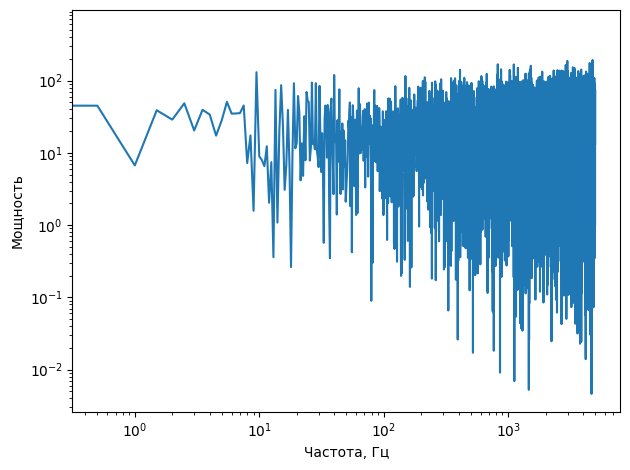

In [44]:
like_geiger_spectrum = like_geiger_wave.make_spectrum()
like_geiger_spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [45]:
like_geiger_spectrum.estimate_slope().slope

-0.001745207471521577

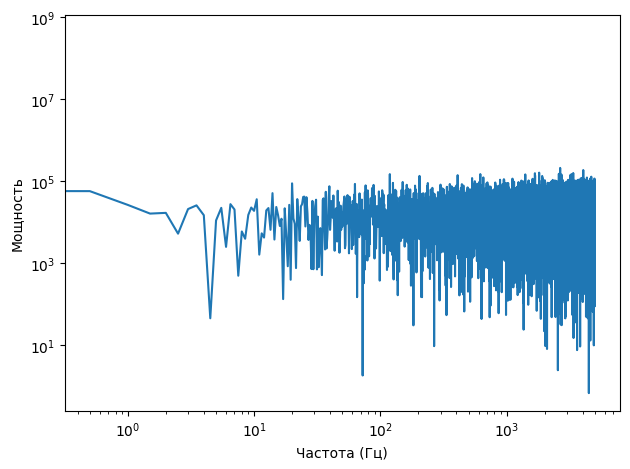

In [46]:
like_white_noise_spectrum = like_white_noise_wave.make_spectrum()
like_white_noise_spectrum.plot_power()
decorate(xlabel='Частота (Гц)', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [47]:
like_white_noise_spectrum.estimate_slope().slope

0.015479905151428316

# Упражнение 4.5

In [48]:
def voss_mccartney(rows, columns=16):
    array = np.empty((rows, columns))
    array.fill(np.nan)
    array[0, :] = np.random.random(columns)
    array[:, 0] = np.random.random(rows)

    cols = np.random.geometric(0.5, rows)
    cols[cols >= columns] = 0
    new_rows = np.random.randint(rows, size=rows)
    array[new_rows, cols] = np.random.random(rows)

    data = pd.DataFrame(array)
    data.fillna(method='ffill', axis=0, inplace=True)
    total = data.sum(axis=1)

    return total.values

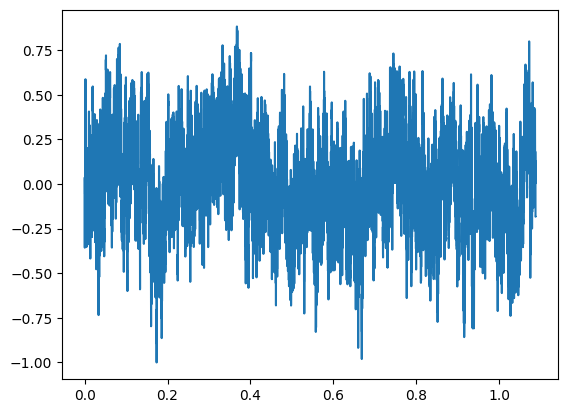

In [49]:
ys = voss_mccartney(12000)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

In [50]:
wave.make_audio()

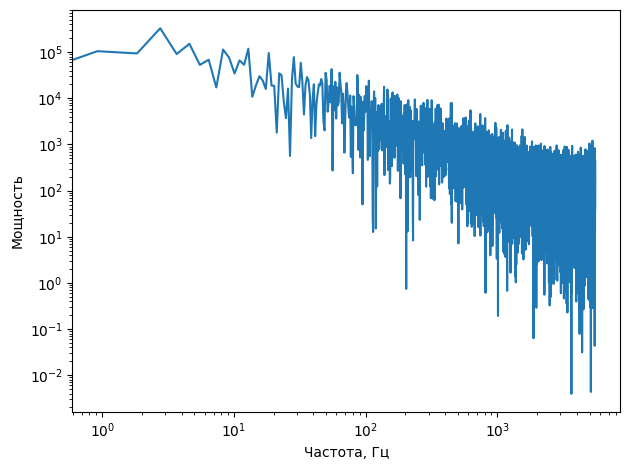

In [51]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Частота, Гц', ylabel='Мощность', **dict(xscale='log', yscale='log'))

In [52]:
spectrum.estimate_slope().slope

-1.0088350499418455